In [65]:
import numpy as np
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from scipy import *
import scipy
from scipy.io import mmread
import pylab
import time
import scipy.sparse.linalg as spl

In [71]:
# mycg implementation
def mycg(A,b,x0,maxit,repeat_update=0,restarting=1):
    x = x0
    r = b-A@x
    initial_error = r.T@r
    p = r
    E=[]
    for i in range(maxit):
        r_dot_r = r.T@r
        if r_dot_r<initial_error*1e-15:
            return x,E
        Ap = A @ p
        alpha = r_dot_r/(p.T @ Ap)
        x+= alpha*p
        if (i+1)%restarting==0:
            r = b-A@x
        else:
            r     -= alpha*Ap
        beta= (r.T@r)/r_dot_r
        p       = r + beta*p
        for j in range(repeat_update):
            p       = r + beta*p
        #p       = (1+repeat_update)*r + beta*p
        E.append(r_dot_r)
        
    return x,E

def mycg_modified_alpha(A,b,x0,maxit,repeat_update=0,restarting=1):
    x = x0
    r = b-A@x
    initial_error = r.T@r
    p = r
    E=[]
    for i in range(maxit):
        r_dot_r = r.T@r
        if r_dot_r<initial_error*1e-15:
            return x,E
        Ap = A @ p
        alpha = p.T@r/(p.T @ Ap)
        x+= alpha*p
        if (i+1)%restarting==0:
            r = b-A@x
        else:
            r     -= alpha*Ap
        beta= (r.T@r)/r_dot_r
        p       = r + beta*p
        for j in range(repeat_update):
            p       = r + beta*p
        #p       = (1+repeat_update)*r + beta*p
        E.append(r_dot_r)
        
    return x,E


In [19]:
# load problem : test cant
A = mmread("/Users/user/test/cant.mtx")
dim = A.shape[0]
A = A.tocsr()
true_x = np.random.rand(dim)
b = A @ true_x
x0=np.zeros(dim)

In [57]:
x0 = np.zeros(A.shape[0])
ans= []
E=[[],[],[]]
for repeat in range(3):
    print("repeat number = ",repeat)
    start = time.time()
    x,temp = cg(A,b,np.zeros(A.shape[0]),10000,repeat,1)
    E[repeat].append(temp)
    end = time.time()
    print("time takes:", end - start, " for ",len(E),"iterations")
    print("residue squared:",(b - A @ x).T @ (b- A @ x))
    ans.append(np.copy(x))
    print("\n")

repeat number =  0
time takes: 90.09711599349976  for  3 iterations
residue squared: 0.00022181138800134517


repeat number =  1
time takes: 101.1284019947052  for  3 iterations
residue squared: 0.0004790064278352587


repeat number =  2
time takes: 104.69668912887573  for  3 iterations
residue squared: 0.0011053682913737119




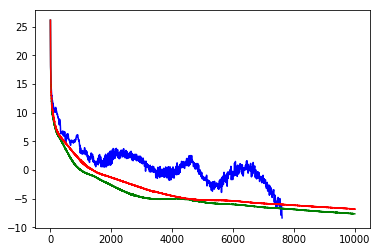

In [58]:
plot(log(E[0][0]),"b")
plot(log(E[1][0]),"g")
plot(log(E[2][0]),"r")

In [132]:
def gd_alpha(A,b,x0,maxit,repeat_update=0,restarting=1):
    x = x0
    r = b-A@x
    initial_error = r.T@r
    p = r
    E=[]
    r_dot_r = r.T@r
    E.append(r_dot_r)

    for i in range(maxit):
        if r_dot_r<initial_error*1e-15:
            return x,E
        alpha = r_dot_r/(r.T @ A @ r)
        x+= alpha*r
        r = b-A@x
        r_dot_r = r.T@r
        E.append(r_dot_r)
        
    return x,E

def gd_alpha_fixed(A,b,x0,maxit,repeat_update=0,restarting=1):
    x = x0
    r = b-A@x
    initial_error = r.T@r
    p = r
    E=[]
    r_dot_r = r.T@r
    E.append(r_dot_r)

    for i in range(maxit):
        if r_dot_r<initial_error*1e-15:
            return x,E
        alpha = 0.0001
        x = x + alpha*r
        r = b-A@x
        r_dot_r = r.T@r
        E.append(r_dot_r)
        
    return x,E

In [ ]:
def gd_alpha_l2_loss(A,b,x0,maxit,repeat_update=0,restarting=1):
    p = A^T(Ax-b)
    # not done

In [60]:
E_gd_alpha=[]
start = time.time()
x,E_gd_alpha = gd_alpha(A,b,np.zeros(A.shape[0]),10000,repeat,1)
end = time.time()
print("time takes:", end - start)
print("residue squared:",(b - A @ x).T @ (b- A @ x))

time takes: 111.06176471710205
residue squared: 430.597760852601


In [140]:
E_gd_alpha_fixed=[]
start = time.time()
x,E_gd_alpha_fixed = gd_alpha_fixed(A,b,np.zeros(A.shape[0]),10000,repeat,1)
end = time.time()
print("time takes:", end - start)
print("residue squared:",(b - A @ x).T @ (b- A @ x))

time takes: 72.1058759689331
residue squared: 216.03508884865687


In [78]:
x0 = np.zeros(A.shape[0])
ans= []
E_my_CG_modified_alpha=[[],[],[]]
for repeat in range(3):
    print("repeat number = ",repeat)
    start = time.time()
    x,temp = cg(A,b,np.zeros(A.shape[0]),10000,repeat,1)
    E_my_CG_modified_alpha[repeat].append(temp)
    end = time.time()
    print("time takes:", end - start, " for ",len(E),"iterations")
    print("residue squared:",(b - A @ x).T @ (b- A @ x))
    ans.append(np.copy(x))
    print("\n")

repeat number =  0
time takes: 76.36092281341553  for  3 iterations
residue squared: 0.00022181138800134517


repeat number =  1
time takes: 94.81251096725464  for  3 iterations
residue squared: 0.0004790064278352587


repeat number =  2
time takes: 97.511146068573  for  3 iterations
residue squared: 0.0011053682913737119




/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


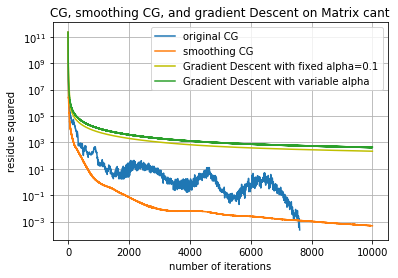

In [145]:
fig=plt.figure()
fig.show()
ax=fig.add_subplot(111)
x=[]
ax.plot(E[0][0],label='original CG',fillstyle='none')
ax.plot(E[1][0],label='smoothing CG')
ax.plot(E_gd_alpha_fixed,c="y",label='Gradient Descent with fixed alpha=0.1')
ax.plot(E_gd_alpha,label='Gradient Descent with variable alpha')

ax.set_yscale('log')
plt.xlabel('number of iterations')
plt.ylabel('residue squared')
plt.title('CG, smoothing CG, and gradient Descent on Matrix cant')

plt.grid()
plt.legend(loc=1)
plt.show()

In [102]:
# mycg + cg
def mycg_downgrade(A,b,x0,maxit,repeat_update=0,restarting=1,initial_error = None):
    x = x0
    r = b-A@x
    if initial_error==None: initial_error = r.T@r
    p = r
    E=[]
    for i in range(maxit):
        r_dot_r = r.T@r
        if repeat_update>0 and r_dot_r<initial_error*1e-11:
            print("downgrade at iteration: ",i)
            x,E2 = mycg_downgrade(A,b,x0,maxit-i,0,restarting,initial_error)
            E = E+E2
            return x,E
        if r_dot_r<initial_error*1e-15:
            return x,E
        Ap = A @ p
        alpha = r_dot_r/(p.T @ Ap)
        x+= alpha*p
        if (i+1)%restarting==0:
            r = b-A@x
        else:
            r     -= alpha*Ap
        beta= (r.T@r)/r_dot_r
        p       = r + beta*p
        for j in range(repeat_update):
            p       = r + beta*p
        #p       = (1+repeat_update)*r + beta*p
        E.append(r_dot_r)
        
    return x,E

In [103]:
x0 = np.zeros(A.shape[0])
ans= []
E_my_CG_modified_alpha=[[],[],[]]
for repeat in range(3):
    print("repeat number = ",repeat)
    start = time.time()
    x,temp = mycg_downgrade(A,b,np.zeros(A.shape[0]),10000,repeat,1)
    E_my_CG_modified_alpha[repeat].append(temp)
    end = time.time()
    print("time takes:", end - start, " for ",len(E),"iterations")
    print("residue squared:",(b - A @ x).T @ (b- A @ x))
    ans.append(np.copy(x))
    print("\n")

repeat number =  0
time takes: 102.86430525779724  for  3 iterations
residue squared: 0.00022181138800134517


repeat number =  1
downgrade at iteration:  821
time takes: 106.80845880508423  for  3 iterations
residue squared: 0.00021472083563606046


repeat number =  2
downgrade at iteration:  1135
time takes: 106.85040378570557  for  3 iterations
residue squared: 0.00021311593715439087




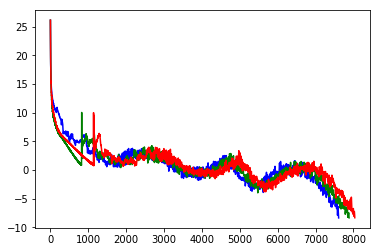

In [104]:
plot(log(E_my_CG_modified_alpha[0][0]),"b")
plot(log(E_my_CG_modified_alpha[1][0]),"g")
plot(log(E_my_CG_modified_alpha[2][0]),"r")

In [107]:
for i in range(3): print(len(E_my_CG_modified_alpha[i][0]))

7611
7887
8037


repeat number =  0
time takes: 15.051684141159058  for  3 iterations
residue squared: 24.232870678321383


repeat number =  1
downgrade at iteration:  821
time takes: 15.752609014511108  for  3 iterations
residue squared: 119.42324706499735


repeat number =  2
time takes: 15.365996837615967  for  3 iterations
residue squared: 4.956424146069723




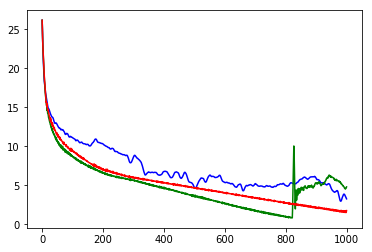

In [112]:
# mycg + cg
def mycg_downgrade2(A,b,x0,maxit,repeat_update=0,restarting=1,initial_error = None):
    x = x0
    r = b-A@x
    if initial_error==None: initial_error = r.T@r
    p = r
    E=[]
    for i in range(maxit):
        r_dot_r = r.T@r
        if repeat_update>0 and r_dot_r<initial_error*1e-20:
            print("downgrade at iteration: ",i)
            x,E2 = mycg_downgrade2(A,b,x0,maxit-i,0,restarting,initial_error)
            E = E+E2
            return x,E
        if r_dot_r<initial_error*1e-15:
            return x,E
        Ap = A @ p
        alpha = r_dot_r/(p.T @ Ap)
        x+= alpha*p
        if (i+1)%restarting==0:
            r = b-A@x
        else:
            r     -= alpha*Ap
        beta= (r.T@r)/r_dot_r
#       p       = (1+beta)*r + beta*beta*p
        p   = r + beta*p
        for j in range(repeat_update):
            p = r + beta*p
        #p       = (1+repeat_update)*r + beta*p
        E.append(r_dot_r)
        
    return x,E
x0 = np.zeros(A.shape[0])
ans= []
E_my_CG_modified_alpha=[[],[],[]]
for repeat in range(3):
    print("repeat number = ",repeat)
    start = time.time()
    x,temp = mycg_downgrade2(A,b,np.zeros(A.shape[0]),1000,repeat,1)
    E_my_CG_modified_alpha[repeat].append(temp)
    end = time.time()
    print("time takes:", end - start, " for ",len(E),"iterations")
    print("residue squared:",(b - A @ x).T @ (b- A @ x))
    ans.append(np.copy(x))
    print("\n")
plot(log(E_my_CG_modified_alpha[0][0]),"b")
plot(log(E_my_CG_modified_alpha[1][0]),"g")
plot(log(E_my_CG_modified_alpha[2][0]),"r")

time takes: 14.50931191444397  for  3 iterations
residue squared: 24.232870678321383




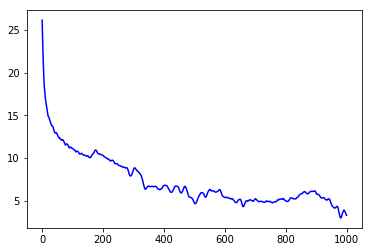

In [123]:
# mycg + cg
def mycg_downgrade3(A,b,x0,maxit,repeat_update=0,restarting=1,initial_error = None):
    x = x0
    r = b-A@x
    if initial_error==None: initial_error = r.T@r
    p = r
    E=[]
    for i in range(maxit):
        r_dot_r = r.T@r
        if repeat_update>0 and r_dot_r<initial_error*1e-20:
            print("downgrade at iteration: ",i)
            x,E2 = mycg_downgrade3(A,b,x0,maxit-i,0,restarting,initial_error)
            E = E+E2
            return x,E
        if r_dot_r<initial_error*1e-15:
            return x,E
        Ap = A @ p
        alpha = r_dot_r/(p.T @ Ap)
        x+= alpha*p
        if (i+1)%restarting==0:
            r = b-A@x
        else:
            r     -= alpha*Ap
        beta= (r.T@r)/r_dot_r
#        p       = r + beta*beta/(1+beta)*p
        if i%5==0:
            p   = r + beta*p
            #p       = (1+beta)*r + beta*beta*p
        else:
            p   = r + beta*p
        E.append(r_dot_r)
        
    return x,E
x0 = np.zeros(A.shape[0])
ans= []
start = time.time()
x,E_2020 = mycg_downgrade3(A,b,np.zeros(A.shape[0]),1000,0,1)
end = time.time()
print("time takes:", end - start, " for ",len(E),"iterations")
print("residue squared:",(b - A @ x).T @ (b- A @ x))
ans.append(np.copy(x))
print("\n")
plot(log(E_2020),"b")

In [128]:
# set coef of r as 2
def mycg(A,b,x0,maxit,repeat_update=0,restarting=1):
    x = x0
    r = b-A@x
    initial_error = r.T@r
    p = r
    E=[]
    for i in range(maxit):
        r_dot_r = r.T@r
        if r_dot_r<initial_error*1e-15:
            return x,E
        Ap = A @ p
        alpha = r_dot_r/(p.T @ Ap)
        x+= alpha*p
        if (i+1)%restarting==0:
            r = b-A@x
        else:
            r     -= alpha*Ap
        beta= (r.T@r)/r_dot_r
        p       = (1+repeat_update)*r + beta*p
        E.append(r_dot_r)
        
    return x,E

In [129]:
x0 = np.zeros(A.shape[0])
ans= []
E=[[],[],[]]
for repeat in range(3):
    print("repeat number = ",repeat)
    start = time.time()
    x,temp = mycg(A,b,np.zeros(A.shape[0]),10000,repeat,1)
    E[repeat].append(temp)
    end = time.time()
    print("time takes:", end - start, " for ",len(E),"iterations")
    print("residue squared:",(b - A @ x).T @ (b- A @ x))
    ans.append(np.copy(x))
    print("\n")

repeat number =  0
time takes: 86.83452081680298  for  3 iterations
residue squared: 0.00022181138800134517


repeat number =  1
time takes: 117.53298997879028  for  3 iterations
residue squared: 64135.006935211524


repeat number =  2
time takes: 111.50404930114746  for  3 iterations
residue squared: 10639633.969835192




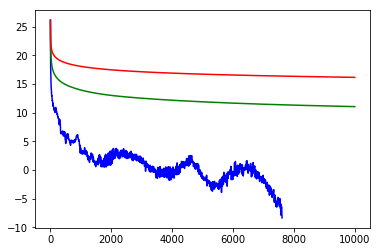

In [130]:
plot(log(E[0][0]),"b")
plot(log(E[1][0]),"g")
plot(log(E[2][0]),"r")

repeat number =  0
time takes: 85.47800016403198  for  3 iterations
residue squared: 0.00022181138800134517


repeat number =  1
time takes: 111.87645101547241  for  3 iterations
residue squared: 0.0004790064278352587


repeat number =  2
time takes: 114.7083032131195  for  3 iterations
residue squared: 0.0011053682913737119




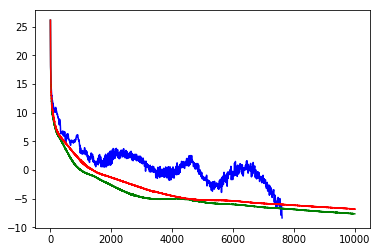

In [131]:
# set coef of r as 2
def mycg(A,b,x0,maxit,repeat_update=0,restarting=1):
    x = x0
    r = b-A@x
    initial_error = r.T@r
    p = r
    E=[]
    for i in range(maxit):
        r_dot_r = r.T@r
        if r_dot_r<initial_error*1e-15:
            return x,E
        Ap = A @ p
        alpha = r_dot_r/(p.T @ Ap)
        x+= alpha*p
        if (i+1)%restarting==0:
            r = b-A@x
        else:
            r     -= alpha*Ap
        beta= (r.T@r)/r_dot_r
        p       = r + beta*p
        for i in range(repeat_update):
            p       = r + beta*p
        E.append(r_dot_r)
        
    return x,E

x0 = np.zeros(A.shape[0])
ans= []
E=[[],[],[]]
for repeat in range(3):
    print("repeat number = ",repeat)
    start = time.time()
    x,temp = mycg(A,b,np.zeros(A.shape[0]),10000,repeat,1)
    E[repeat].append(temp)
    end = time.time()
    print("time takes:", end - start, " for ",len(E),"iterations")
    print("residue squared:",(b - A @ x).T @ (b- A @ x))
    ans.append(np.copy(x))
    print("\n")
plot(log(E[0][0]),"b")
plot(log(E[1][0]),"g")
plot(log(E[2][0]),"r")

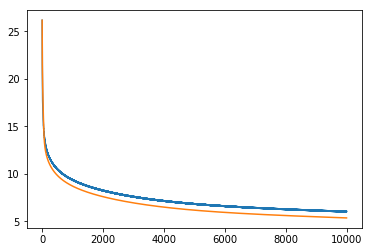

In [141]:
#plot(log(E[0][0]))
#plot(log(E[1][0]))
plot(log(E_gd_alpha))
plot(log(E_gd_alpha_fixed))

